Using TensorFlow backend.


(10000, 32, 32, 3)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


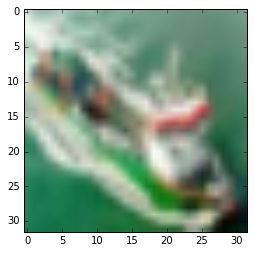

In [1]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import learn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils.np_utils import to_categorical

datadir='data/cifar-10-batches-bin/'

plt.ion()
G = glob.glob (datadir + '*.bin')
A = np.fromfile(G[0],dtype=np.uint8).reshape([10000,3073])
labels = to_categorical(A [:,0])
images = A [:,1:].reshape([10000,3,32,32]).transpose (0,2,3,1)
print images.shape
plt.imshow(images[15])
print labels[11]
images_unroll = A [:,1:]


In [2]:


model = Sequential()

model.add(Convolution2D(16, 5, 5,
                        border_mode='valid',
                        input_shape=(32,32,3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='valid',
                        input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(images[:8000], labels[:8000], batch_size=100, nb_epoch=300,
          verbose=1, validation_data=(images[8000:], labels[8000:]))
score = model.evaluate(images[8000:], labels[8000:], verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 8000 samples, validate on 1000 samples
Epoch 1/300
8000/8000 [==============================] - 35s - loss: 4.8452 - acc: 0.1071 - val_loss: 2.3276 - val_acc: 0.0970
Epoch 2/300
8000/8000 [==============================] - 31s - loss: 2.3178 - acc: 0.1036 - val_loss: 2.3125 - val_acc: 0.0930
Epoch 3/300
8000/8000 [==============================] - 30s - loss: 2.3068 - acc: 0.1046 - val_loss: 2.3099 - val_acc: 0.0960
Epoch 4/300
8000/8000 [==============================] - 30s - loss: 2.3049 - acc: 0.0980 - val_loss: 2.3094 - val_acc: 0.0920
Epoch 5/300
8000/8000 [==============================] - 31s - loss: 2.3023 - acc: 0.1031 - val_loss: 2.3088 - val_acc: 0.0920
Epoch 6/300
8000/8000 [==============================] - 30s - loss: 2.3033 - acc: 0.1044 - val_loss: 2.3094 - val_acc: 0.0900
Epoch 7/300
8000/8000 [==============================] - 30s - loss: 2.3027 - acc: 0.1002 - val_loss: 2.3078 - val_acc: 0.0920
Epoch 8/300
8000/8000 [==============================] - 30s - 